# NLTK trong python

# Cài đặt packages

In [ ]:
import nltk
nltk.download()

# Phân tích nội dung của trang web

Sử dụng mô đun urllib để thu thập dữ liệu từ trang web <br>
Sử dụng BeautifulSoup để làm sạch văn bản

In [15]:
from bs4 import BeautifulSoup 
import urllib.request 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html.parser") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
print (tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUser', 'Submitted', 'DataHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsCommand', 'line', 'usageGarbage',

Dùng NLTK (FreqDist) để đến tần suất xuất hiện của từ

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import nltk 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html.parser") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
freq = nltk.FreqDist(tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:46
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:8
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:3
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behavio

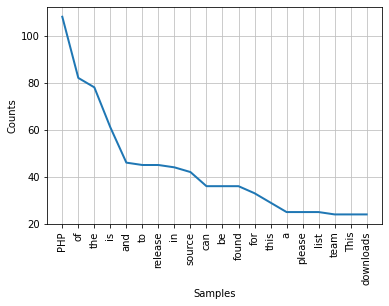

In [2]:
freq.plot(20, cumulative=False)

=> Chắc chắn bài viết này nói về PHP. Bên cạnh đó còn có 1 số từ "the", "a", "an",... Mấy từ này gọi là stop words (những từ bỏ) <br>
Dùng gói <b>stopwords</b> để loại bỏ chúng

In [3]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
clean_tokens = tokens[:] 
sr = stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)


In [6]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk.corpus import stopwords 
response = urllib.request.urlopen('http://php.net/') 
html = response.read() 
soup = BeautifulSoup(html,"html.parser") 
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesEnumerationsErrorsExceptionsFibersGeneratorsAttributesReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUser:1
Submitted:1
DataHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
BehaviourAudio:1
Formats:1
Mani

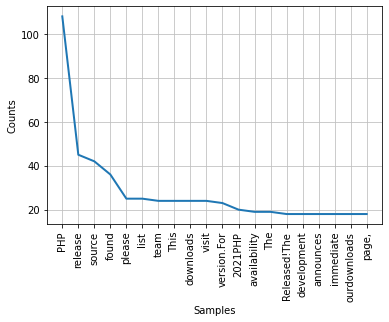

In [7]:
freq.plot(20,cumulative=False)

token hóa văn bản sử dụng NLTK. Ý là phan tách các thành phần lớn hơn thành các thành phần nhỏ 

# Tách cách câu chuẩn

Ví dụ: "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude." <br>
Câu này chúng ta không thể dùng Slice trong python để tách vì "Mr. Adam" cũng có kí tự lạ. => Dùng thử NLTK

In [8]:
from nltk.tokenize import sent_tokenize 
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude." 
print(sent_tokenize(mytext))

['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']


Tách các từ trong câu

In [9]:
from nltk.tokenize import word_tokenize
mytext = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
print(word_tokenize(mytext))

['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']


Để làm việc với tiếng việt

In [ ]:
! pip install underthesea

In [ ]:
from underthesea import sent_tokenize
mytext = "Xin chào thầy. Em là Dương Công Sơn, sinh viên lớp 64CS3"
print(sent_tokenize(mytext))

In [16]:
from underthesea import word_tokenize
mytext = "Xin chào thầy. Em là Dương Công Sơn, sinh viên lớp 64CS3"
print(word_tokenize(mytext))

['Xin', 'chào', 'thầy', '.', 'Em', 'là', 'Dương', 'Công', 'Sơn', ',', 'sinh', 'viên', 'lớp', '64CS3']


# Wordnet
Nghĩa của từ hoặc ví dụ về từ đó

In [32]:
from nltk.corpus import wordnet
syn = wordnet.synsets("NLP")
print(syn[0].definition())
syn = wordnet.synsets("run")
print(syn[0].examples())

the branch of information science that deals with natural language information
['the Yankees scored 3 runs in the bottom of the 9th', 'their first tally came in the 3rd inning']


lấy ra các từ đồng nghĩa

In [35]:
from nltk.corpus import wordnet 
synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']


Từ trái nghĩa

In [36]:
from nltk.corpus import wordnet
antonyms = []
for syn in wordnet.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print(antonyms)

['large', 'big', 'big']


Lấy ra động từ, danh từ, tính từ, trạng từ

In [37]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
print(lemmatizer.lemmatize('playing', pos="v")) 
print(lemmatizer.lemmatize('playing', pos="n")) 
print(lemmatizer.lemmatize('playing', pos="a")) 
print(lemmatizer.lemmatize('playing', pos="r"))


play
playing
playing
playing


Lấy ra nghĩa gốc của từ

In [38]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
print(stemmer.stem('increases'))

increas
